In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

#### Let's load the Nashville zipcode data and look at the first few rows
- geopandas reads files with the `read_file()` method
- The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku


In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [3]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

#### Now let's look at the difference between calling the first geometry variable.....


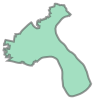

In [4]:
zipcodes.loc[0, 'geometry']

#### ...and printing it


In [5]:
print(zipcodes.loc[0, 'geometry'])

MULTIPOLYGON (((-86.68724897141 36.318212121092, -86.687216475338 36.318210560887, -86.687181702435 36.318208780693, -86.687146962761 36.318206917893, -86.687112187256 36.318205000347, -86.687077445444 36.318202972151, -86.687042702928 36.318200862685, -86.687034690751 36.318200362824, -86.687007959928 36.318198697129, -86.68697325063 36.318196422067, -86.686938539918 36.318194065167, -86.686903827781 36.318191625285, -86.68686914958 36.318189102792, -86.686834437433 36.318186498074, -86.6867997571 36.318183810757, -86.686765111412 36.318181040826, -86.686730430357 36.318178188106, -86.686695782299 36.318175225883, -86.68666116771 36.318172208522, -86.686626552408 36.318169108746, -86.686591935688 36.318165926561, -86.686557318725 36.318162634491, -86.686522735235 36.318159287854, -86.686488151499 36.318155830759, -86.686453600524 36.318152318529, -86.68641904813 36.31814872389, -86.68638449549 36.318145018792, -86.686349976324 36.318141259129, -86.68631549015 36.318137389391, -86.6862

#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


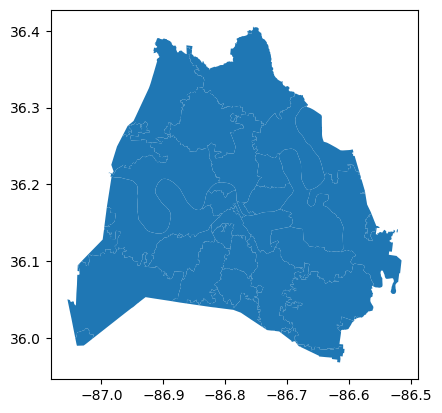

In [6]:
zipcodes.plot();

#### Add information and styling 
- set the `column =` to a column in the GeoDataFrame to color by
- change the [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
- pass in keywords to tweak the legend created by [`matplotib`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)


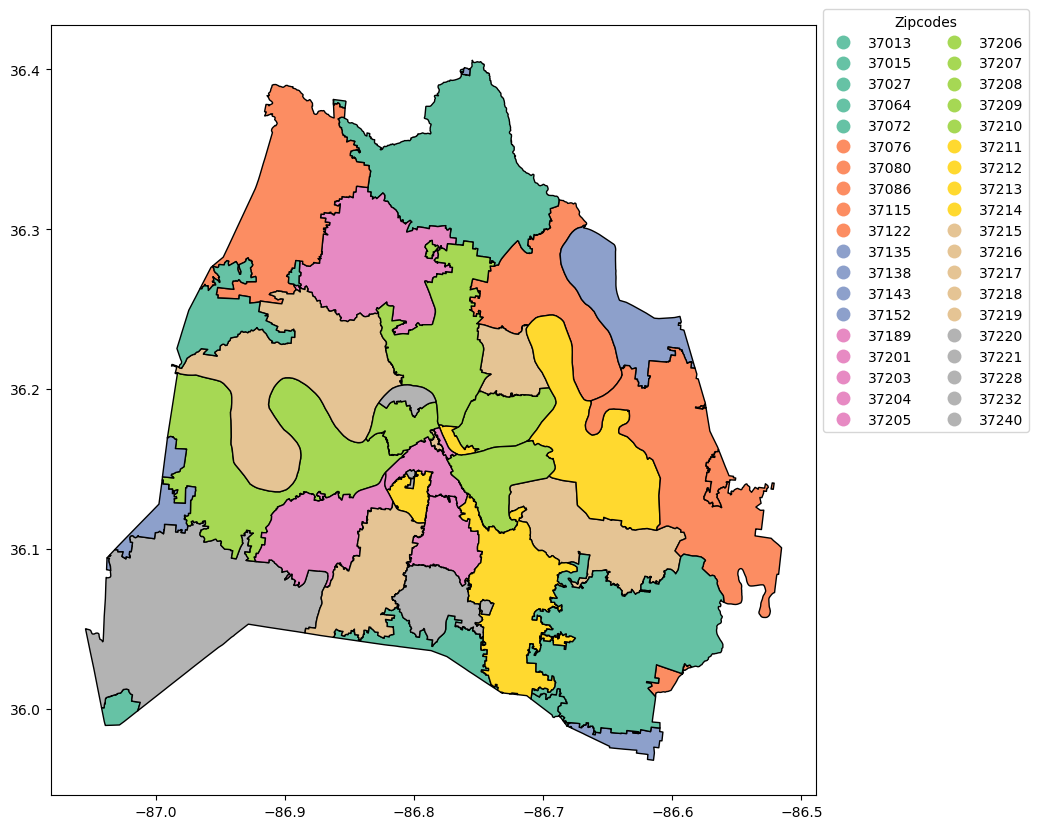

In [7]:
#geopandas will take care of legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

#### Next you will read in the bus stop data
- downloaded from https://data.nashville.gov/Transportation/Regional-Transportation-Authority-Bus-Stops/p886-fnbd
- cleaned:
    - rename columns 
    - drop unwanted columns 
    - parse `lat` and `lng` columns from `location`
- print the shape 
- take a look at the first 3 rows

In [8]:
Metro_Art = gpd.read_file('../data/Metro_Art_in_Public_Places_view_7654276037388908582.geojson')
print(Metro_Art.crs)
Metro_Art.head( )

EPSG:4326


,Title,ArtistLastName,ArtistFirstName,Address,Medium,InstallationType,Description,Latitude,Longitude,City,State,ZipCode,GlobalID,OBJECTID,geometry
0,Les Paul Guitar Mural,Hughes,Milree,100 Broadway,Painting,Mural,None,36.16240,-86.77491,Nashville,TN,37201,35e62647-30e1-48e6-8ff8-4a295f9fd7cd,1,POINT (-86.77491 36.16240)
1,Sam Davis,LeQuire,Alan,4001 Harding Road,Bronze,Sculpture,None,36.12856,-86.83660,Nashville,TN,37205,3da320dd-d95f-4fdd-a11f-520d849c83fa,2,POINT (-86.83660 36.12856)
2,The Flutist,Varo,Marton,1 Symphony Place,Marble,Sculpture,"Statue commemorating Kenneth D Schermerhorn, M...",36.15961,-86.77594,Nashville,TN,37201,878eaed2-ef42-48fb-a12c-4f480c6cbe6f,3,POINT (-86.77594 36.15961)
3,Blowing Bubbles,Faxon,Russell,4715 Harding Pike,Bronze,Sculpture,None,36.11975,-86.85343,Nashville,TN,37205,494eb47f-3f49-4e35-bfef-2b02a7db3e88,4,POINT (-86.85343 36.11975)
4,Anticipation,Faxon,Russell,505 Deaderick Street,Cold cast bronze,Sculpture,A statue of a woman with legs crossed sitting ...,36.16489,-86.78184,Nashville,TN,37219,11ee93fb-ebc5-433c-b2e3-4d442ca0e6e1,5,POINT (-86.78184 36.16489)


In [9]:
Metro_Art.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Title             164 non-null    object  
 1   ArtistLastName    164 non-null    object  
 2   ArtistFirstName   159 non-null    object  
 3   Address           164 non-null    object  
 4   Medium            162 non-null    object  
 5   InstallationType  164 non-null    object  
 6   Description       107 non-null    object  
 7   Latitude          162 non-null    float64 
 8   Longitude         162 non-null    float64 
 9   City              164 non-null    object  
 10  State             164 non-null    object  
 11  ZipCode           162 non-null    object  
 12  GlobalID          164 non-null    object  
 13  OBJECTID          164 non-null    int64   
 14  geometry          162 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(11)
memory usage: 19.

- you want the CRS for the bus stops to match the CRS in the zipcodes GeoDataFrame 


In [10]:
Metro_Art.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Now you are ready to combine bus stops and zipcodes with a spatial join
- first a little clean up for the zipcodes
    - just keep the zip, po_name, and geometry columns
- then construct the join 
    - keep in mind that you want to find the **bus stops within a zip code polygon**
    - the geometry for the new (combined) GeoDataFrame comes from the left GeoDataFrame


In [11]:
metro_art_by_zip = gpd.sjoin(Metro_Art, zipcodes, how = 'left', predicate = 'within')

In [12]:
metro_art_by_zip.head()

,Title,ArtistLastName,ArtistFirstName,Address,Medium,InstallationType,Description,Latitude,Longitude,City,...,ZipCode,GlobalID,OBJECTID,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
0,Les Paul Guitar Mural,Hughes,Milree,100 Broadway,Painting,Mural,None,36.16240,-86.77491,Nashville,...,37201,35e62647-30e1-48e6-8ff8-4a295f9fd7cd,1,POINT (-86.77491 36.16240),36.0,37201,14,NASHVILLE,25670.555742711778,11151362.94934082
1,Sam Davis,LeQuire,Alan,4001 Harding Road,Bronze,Sculpture,None,36.12856,-86.83660,Nashville,...,37205,3da320dd-d95f-4fdd-a11f-520d849c83fa,2,POINT (-86.83660 36.12856),32.0,37205,16,NASHVILLE,146801.80831498865,400978073.00933838
2,The Flutist,Varo,Marton,1 Symphony Place,Marble,Sculpture,"Statue commemorating Kenneth D Schermerhorn, M...",36.15961,-86.77594,Nashville,...,37201,878eaed2-ef42-48fb-a12c-4f480c6cbe6f,3,POINT (-86.77594 36.15961),36.0,37201,14,NASHVILLE,25670.555742711778,11151362.94934082
3,Blowing Bubbles,Faxon,Russell,4715 Harding Pike,Bronze,Sculpture,None,36.11975,-86.85343,Nashville,...,37205,494eb47f-3f49-4e35-bfef-2b02a7db3e88,4,POINT (-86.85343 36.11975),32.0,37205,16,NASHVILLE,146801.80831498865,400978073.00933838
4,Anticipation,Faxon,Russell,505 Deaderick Street,Cold cast bronze,Sculpture,A statue of a woman with legs crossed sitting ...,36.16489,-86.78184,Nashville,...,37219,11ee93fb-ebc5-433c-b2e3-4d442ca0e6e1,5,POINT (-86.78184 36.16489),24.0,37219,15,NASHVILLE,21013.192337432083,6579013.4385986328


#### Now that the data is joined spatially you can count the bus stops by zip code  and see how many stops are within each polygon 
- using the `value_counts()` method


In [39]:
metro_art_by_zip['zip'].value_counts()

zip
37219    33
37203    25
37201    21
37210    11
37212    10
37205    10
37206     9
37208     7
37221     6
37214     6
37204     4
37209     4
37115     3
37207     2
37216     2
37211     2
37240     2
37215     2
37213     2
37076     1
Name: count, dtype: int64

#### Let's take a closer look at the 272 bus stops in the 37207 zip code
- filter the stops_by_zip data to just get bus stops in 37207
- filter the zip code geodataframe to just the polygon (row) for 37207


In [40]:
art_in_37219 = metro_art_by_zip.loc[metro_art_by_zip['zip'] == '37219']
art_in_37219.shape

(33, 21)

In [41]:
art_in_37219 = metro_art_by_zip.loc[metro_art_by_zip['zip'] == '37219'].reset_index()
art_in_37219

,index,Title,ArtistLastName,ArtistFirstName,Address,Medium,InstallationType,Description,Latitude,Longitude,...,ZipCode,GlobalID,OBJECTID,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
0,4,Anticipation,Faxon,Russell,505 Deaderick Street,Cold cast bronze,Sculpture,A statue of a woman with legs crossed sitting ...,36.164890,-86.781840,...,37219,11ee93fb-ebc5-433c-b2e3-4d442ca0e6e1,5,POINT (-86.78184 36.16489),24.0,37219,15,NASHVILLE,21013.192337432083,6579013.4385986328
1,5,Piecing It All Together,Cooper,Michael,600 Church Street,Painting on Stone,Mural,None,36.162810,-86.781860,...,37219,a0aa9c08-31e9-4545-b34e-bf9b1f574e06,6,POINT (-86.78186 36.16281),24.0,37219,15,NASHVILLE,21013.192337432083,6579013.4385986328
2,7,Chet Atkins,Faxon,Russell,Corner of Fifth Avenue North and Union Street,Bronze stool and guitar on a granite plynth,Sculpture,A sculpture of a young Chet Atkins seated on a...,36.164660,-86.781020,...,37219,59e2b7fc-0e3a-477d-984a-be7ff0265a94,8,POINT (-86.78102 36.16466),24.0,37219,15,NASHVILLE,21013.192337432083,6579013.4385986328
3,10,Women Suffrage Memorial,LeQuire,Alan,600 Charlotte Avenue,Bronze sculpture,Sculpture,None,36.165270,-86.783820,...,37219,f8a8d364-3eca-4a83-b7fa-c2bfe69dfd14,11,POINT (-86.78382 36.16527),24.0,37219,15,NASHVILLE,21013.192337432083,6579013.4385986328
4,13,Foliated Scroll,Bloomer,Kent,615 Church Street,Aluminum,Frieze,a contemporary adaptation of a classical folia...,36.162150,-86.782050,...,37219,2a955a5b-a8e1-4061-8741-ea0317c9fb1d,14,POINT (-86.78205 36.16215),24.0,37219,15,NASHVILLE,21013.192337432083,6579013.4385986328
5,15,Sergeant Alvin C. York,de Weldon,Felix,600 Charlotte Avenue,Bronze with green patina on green Swedish granite,Sculpture,A full length portrait of Sergeant Alvin C. Yo...,36.165600,-86.782750,...,37219,b0ec641f-789d-476b-b5f0-40e762228ffb,16,POINT (-86.78275 36.16560),24.0,37219,15,NASHVILLE,21013.192337432083,6579013.4385986328
6,23,"Nashville, A History through Maps and Aerial V...",Haas,Richard,615 Church Street,Oil on Canvas,Mural,Eight scenes showing the development of Nashvi...,36.162150,-86.782050,...,37219,cb494c19-a981-4bd3-bd69-d09a6facf998,24,POINT (-86.78205 36.16215),24.0,37219,15,NASHVILLE,21013.192337432083,6579013.4385986328
7,39,Coach Ed Temple,Hanlon,Brian,"19 Junior Giliam Way, First Tennessee Park",Bronze,Sculpture,None,36.173170,-86.785120,...,37219,e1e0f00b-6f95-4351-8697-f345ba51918e,40,POINT (-86.78512 36.17317),24.0,37219,15,NASHVILLE,21013.192337432083,6579013.4385986328
8,56,Headstones,Various,Various,1001 4th Avenue South,Stone,Sculpture,None,36.147550,-86.769460,...,37219,f9a33bd5-774a-4542-8a6d-17bb72d2a141,57,POINT (-86.78331 36.16560),24.0,37219,15,NASHVILLE,21013.192337432083,6579013.4385986328
9,66,Untitled,Parrish,Frank,120 White Bridge Road,"Painted sheet metal; base - concrete, wooden r...",Various,"Three repeating black curved metal shapes, pos...",36.134630,-86.857290,...,37219,09da8311-acd5-4155-9803-52e7ca24c3d9,67,POINT (-86.78382 36.16527),24.0,37219,15,NASHVILLE,21013.192337432083,6579013.4385986328


In [42]:
polygon37219 = zipcodes.loc[zipcodes['zip'] == '37219']
polygon37219.shape

(1, 6)

#### Now plot these two together
- first plot the polygons for 37207 and make them light green
- next plot the points for the bus stops and color them by route

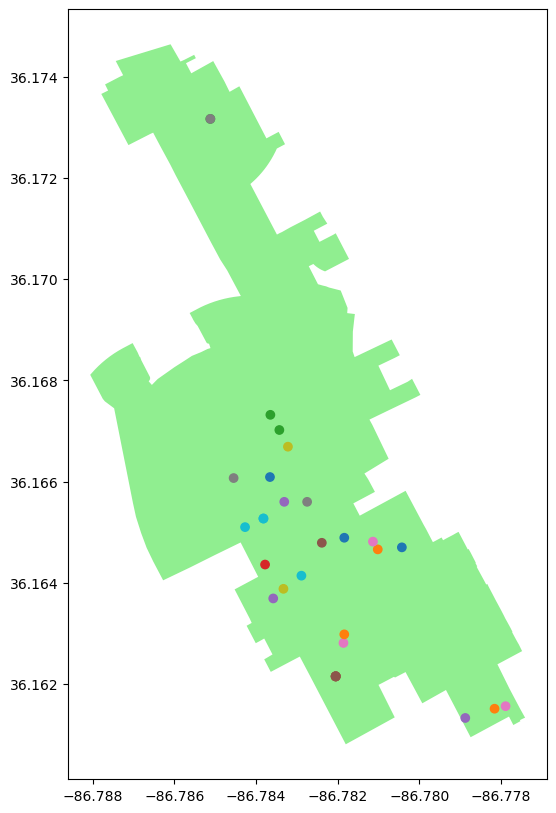

In [43]:
#fig, ax = matplotlib.subplots()
ax = polygon37219.plot(figsize = (8, 10), color = 'lightgreen')
art_in_37219.plot( ax = ax, column = 'Title');
plt.show();

#### We're getting there! It would be helpful to have streets, though wouldn't it? We can add a street map with the folium package.

#### folium maps require a center point for the street map. 
- Make use of a GeoSeries attribute (.centroid) which gives the center of a polygon
- Since there are two polygons which should we use?

In [44]:
polygon37219.geometry.centroid

C:\Users\bonil\AppData\Local\Temp\ipykernel_14120\226734311.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37219.geometry.centroid


24    POINT (-86.78317 36.16682)
dtype: geometry

In [45]:
#find the center of the larger (more southern) polygon and look at it
center = polygon37219.geometry.centroid[24]
print(center)

POINT (-86.783173370701 36.16681838008157)


C:\Users\bonil\AppData\Local\Temp\ipykernel_14120\171388184.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37219.geometry.centroid[24]


#### Folium requires a location point as an array 
- with *latitude* first
- but shapely Points have *longitude* first 

In [46]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.16681838008157, -86.783173370701]


#### To create a folium map just call the folium `Map()` constructor
- `location` is the only argument required by the constructor
    - Set `area_center` as the `location` of the folium map. 
- `zoom_start` is an optional argument 
    - A setting of 12 should get us nice and close

In [47]:
#create our map of Nashville Zip Code 37207 and show it
map_37219 = folium.Map(location =  area_center, zoom_start = 12)
map_37219

#### Next, let's add our 37207 polygon and bus stop markers.

#### `itterows()` is a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values. 
- Below, we are printing the row values for the first 3 row as we iterate through the GeoDataFrame of bus stops in 37207. 
- This idea will be helpful for creating our markers!

In [48]:
i = 0
for row_index, row_values in art_in_37219.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 0
values are:
 
index                                                               4
Title                                                    Anticipation
ArtistLastName                                                  Faxon
ArtistFirstName                                               Russell
Address                                          505 Deaderick Street
Medium                                               Cold cast bronze
InstallationType                                            Sculpture
Description         A statue of a woman with legs crossed sitting ...
Latitude                                                     36.16489
Longitude                                                   -86.78184
City                                                        Nashville
State                                                              TN
ZipCode                                                         37219
GlobalID                         11ee93fb-ebc5-433c-b2e3-4d442ca0

#### Create map_37207 again with additional features:
- add the zipcode area outline (polygon_37207)
- iterate through the stops_in_37207 to
    - create location from each lat and lng
    - create a popup from the stop column
    - create a custom icon if you want with [font-awesome](https://fontawesome.com/v4.7.0/icons/)
    - build a marker from each location and popup and (optionally) your custom icon 
    - add the marker to  `map_37207`
- display `map_37207`

In [59]:
#draw our zip code area: 37207
map_37219 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37219).add_to(map_37219)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in art_in_37219.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Title'])
    icon=folium.Icon(color="blue",icon="paint-brush", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37219)
map_37219.save('../maps/map37219.html')

#display our map
map_37219

In [69]:
#dcopied cell to try to add images 
from folium import IFrame
image_urls = [
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/316_Anticipation_Faxon.jpg",
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/324_Piecing_It_All_Together_Cooper.jpg",
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/317_Chet_Atkins_Faxon.jpg",
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/337_Womens_Suffrage_LeQuire.jpg",
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/319_Foliated_Scroll_Bloomer.jpg",
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/332_Alvin_C_York_Deweldon.jpg",
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/322_Nashville_History_Haas.jpg",
    "https://live.staticflickr.com/4303/36192698116_7526803843_b.jpg",
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/311_Headstones_Nashville_City_Cemetery.jpg",
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/386_Untitled_Parrish.jpg",
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/300_Fourth_Commerce_Walker.jpg",
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/407_12th_and_Porter_Kennedy.jpg",
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/315_Story_of_Nashville_Ridley_detail.jpg",
    "https://i0.wp.com/nashvillepublicart.com/wp-content/uploads/2018/06/CashMain.jpg",
    "https://i0.wp.com/nashvillepublicart.com/wp-content/uploads/2018/10/BeautifulDecay.jpg",
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/318_Chairs_McGraw.jpg",
    "https://i0.wp.com/nashvillepublicart.com/wp-content/uploads/2018/05/CarterPotrait.jpg",
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/357_Polarbears_with_Snowballs_Unknown.jpg",
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/314_Threshhold_Sorci.jpg",
    "https://i0.wp.com/nashvillepublicart.com/wp-content/uploads/2018/05/WW2Main.jpg",
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/320_La_Storia_Kubach-Wilmsen.jpg",
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/333_TN_Confederate_Womens_Kinney.jpg",
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/408_Building_Positive_Comm_Healing_Arts_Project.jpg",
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/339_Mountain_Group_Mims.jpg",
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/387_Dragon_Wall_Glick_Randolph.jpg",
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/351_Rolling_Hills_Ulibarri.jpg",
    "https://i0.wp.com/nashvillepublicart.com/wp-content/uploads/2018/03/sewingright.jpg",
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/338_Equestrian_Group_Mims.jpg",
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/304_Lightning_Wire_Walker.jpg",
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/378_Angel_Ralston.jpg",
    "https://i0.wp.com/nashvillepublicart.com/wp-content/uploads/2016/09/wellddubois.jpg",
    "https://i0.wp.com/nashvillepublicart.com/wp-content/uploads/2017/07/pomodoros.jpg",
    "https://dummeraugust.com/main/content/blog/posts/demos/public_art_nashville/images/309_Timeless_Sorci.jpg"
]
    
map_37219_2 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37219).add_to(map_37219)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in art_in_37219.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Title'])
    icon=folium.Icon(color="pink",icon="paint-brush", prefix='fa')

    img_url = image_urls[row_index]

    html = f'<img src="{img_url}" width="200"><br>{pop}'

    iframe = IFrame(html, width=220, height=200)
    popup = folium.Popup(iframe, max_width=2650)
    
    marker = folium.Marker(
        location = loc, 
        popup = popup,
        icon=icon
    )

    marker.add_to(map_37219_2)
map_37219_2.save('../maps/map37219_2.html')

#display our map
map_37219_2

#### If you have a lot of markers, you might want to use marker clusters
- Folium has `MarkerCluster()` and `FastMarkerCluster()`
- Construct a `MarkerCluster()` 
    - construct a `MarkerCluster()` and `.add_to()` the map
    - when you loop through the data and create markers add those to the marker cluster
- Construct a `FastMarkerCluster()` by passing a list of locations

#### You can save your map as an html file and it will retain the interactive qualities

In [34]:
folium.Map?

Init signature:
folium.Map(
    location=None,
    width='100%',
    height='100%',
    left='0%',
    top='0%',
    position='relative',
    tiles='OpenStreetMap',
    attr=None,
    min_zoom=0,
    max_zoom=18,
    zoom_start=10,
    min_lat=-90,
    max_lat=90,
    min_lon=-180,
    max_lon=180,
    max_bounds=False,
    crs='EPSG3857',
    control_scale=False,
    prefer_canvas=False,
    no_touch=False,
    disable_3d=False,
    png_enabled=False,
    zoom_control=True,
    **kwargs,
)
Docstring:     
Create a Map with Folium and Leaflet.js

Generate a base map of given width and height with either default
tilesets or a custom tileset URL. The following tilesets are built-in
to Folium. Pass any of the following to the "tiles" keyword:

    - "OpenStreetMap"
    - "Mapbox Bright" (Limited levels of zoom for free tiles)
    - "Mapbox Control Room" (Limited levels of zoom for free tiles)
    - "Stamen" (Terrain, Toner, and Watercolor)
    - "Cloudmade" (Must pass API key)
    - "Mapb

In [58]:
cluster_map_37219 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37219)

folium.GeoJson(polygon37219).add_to(cluster_map_37219)

# inside the loop add each marker to the cluster
for row_index, row_values in art_in_37219.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Title'])
    icon=folium.Icon(color="blue",icon="paint-brush", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37219.save('../maps/cluster37219.html')

cluster_map_37219

In [57]:
#draw our zip code area: 37207
map_37219 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37219).add_to(map_37219)

#create a list of locations and pass them to FastMarkerCluster()
locations = art_in_37219[['Latitude', 'Longitude']].values.tolist()
map_37219.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37219